In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
# Loading the breast cancer dataset
breast_cancer_data = load_breast_cancer()

# Printing the first sample of the dataset
breast_cancer_data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [4]:
# Printing the target labels of the dataset
breast_cancer_data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
# Splitting the dataset into a training set and a validation set
tranining_data, validation_data, traning_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 100)

# Printing the shapes of the training set and the validation set
print(tranining_data.shape, traning_labels.shape)
print(validation_data.shape, validation_labels.shape)

(455, 30) (455,)
(114, 30) (114,)


In [6]:
# Creating a KNN classifier with k=3
classifier = KNeighborsClassifier(n_neighbors = 3)

In [7]:
# Training the classifier with the training set
classifier.fit(tranining_data, traning_labels)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Evaluating the performance of the classifier on the validation set
classifier.score(validation_data, validation_labels)

0.9473684210526315

22


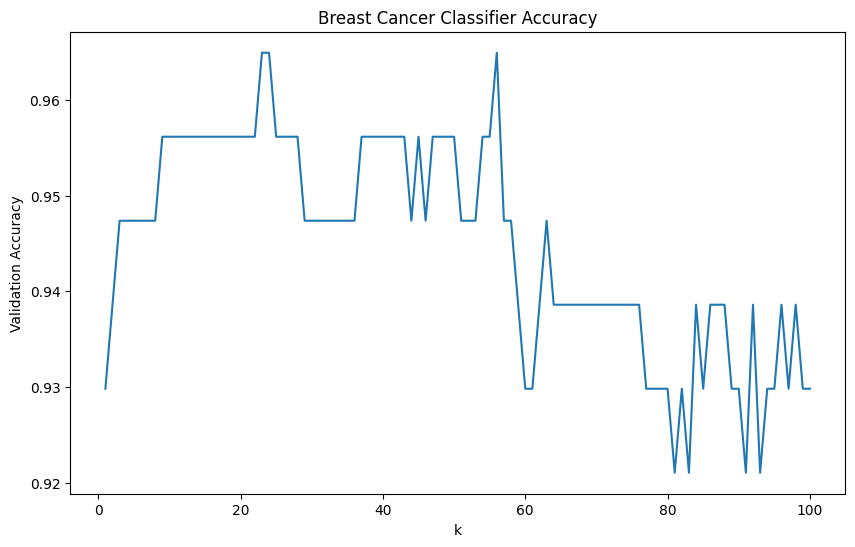

In [18]:
# Plotting the accuracy of the classifier for different values of k
plt.figure(figsize = (10, 6))

accuracies = []

for k in range(1, 100):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(tranining_data, traning_labels)
    # print("k = ", k, "score = ", classifier.score(validation_data, validation_labels))
    accuracies.append(classifier.score(validation_data, validation_labels))

k_list = range(1, 100)

print(np.argmax(accuracies))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [22]:
# Creating a KNN classifier with the best value of k found
classifier = KNeighborsClassifier(n_neighbors = 23)
classifier.fit(tranining_data, traning_labels)
print(classifier.score(validation_data, validation_labels))

0.9649122807017544


In [27]:
# Making predictions on a sample of the validation set
classifier.predict(validation_data[100:110])

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [28]:
# Printing the true labels of the sample
validation_labels[100:110]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1])